# Predicting Movies

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Downloading Data

In [0]:
# Download the data from GCS
!wget 'https://storage.googleapis.com/movies_data/movies_metadata.csv'


--2019-08-08 18:17:32--  https://storage.googleapis.com/movies_data/movies_metadata.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34445126 (33M) [application/octet-stream]
Saving to: ‘movies_metadata.csv.1’

movies_metadata.csv 100%[===================>]  32.85M   122MB/s    in 0.3s    

2019-08-08 18:17:33 (122 MB/s) - ‘movies_metadata.csv.1’ saved [34445126/34445126]



# Reading the movie metadata

In [0]:
data = pd.read_csv('movies_metadata.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Using the Run Time and the Budget to predict the Movie Score

In [0]:
training_data = data[~data['budget'].str.contains('.jpg')]

# Declaring X_training_data
X_training_data = training_data[['budget', 'runtime']]
X_training_data = X_training_data.fillna(0)
X_training_data.head()


,budget,runtime
0,30000000,81.0
1,65000000,104.0
2,0,101.0
3,16000000,127.0
4,0,106.0


In [0]:
# Declaring y_target_data
y_target_data = training_data[['revenue'][0]].fillna(0)
y_target_data.fillna(0)
y_target_data.head()

0    373554033.0
1    262797249.0
2            0.0
3     81452156.0
4     76578911.0
Name: revenue, dtype: float64

# Min of the vote_average

In [0]:
y_target_data.min()

0.0

# Count X and y

In [0]:
y_target_data.count()

45463

In [0]:
X_training_data[['budget', 'runtime']].astype(float).head()

,budget,runtime
0,30000000.0,81.0
1,65000000.0,104.0
2,0.0,101.0
3,16000000.0,127.0
4,0.0,106.0


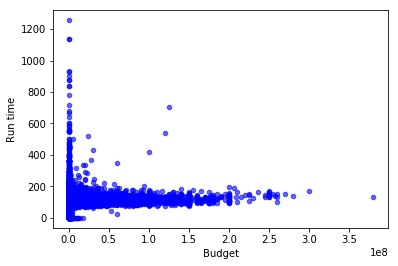

In [0]:
X_training_data[['budget', 'runtime']].astype(float).plot(kind = 'scatter', x  = 'budget' , y = 'runtime' , color = 'blue' , alpha = 0.6)
plt.xlabel('Budget')
plt.ylabel('Run time')
plt.show()

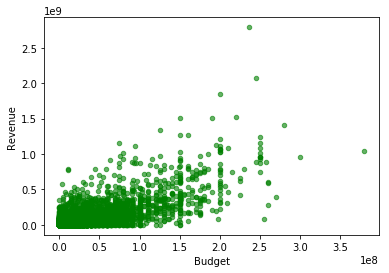

In [0]:
training_data[['budget', 'revenue']].astype(float).plot(kind = 'scatter', x  = 'budget' , y = 'revenue' , color = 'green' , alpha = 0.6)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

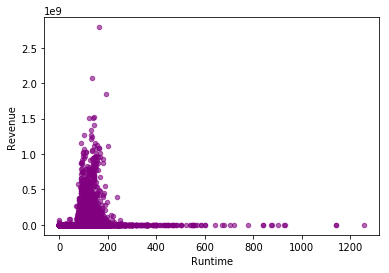

In [0]:
training_data[['runtime', 'revenue']].astype(float).plot(kind = 'scatter', x  = 'runtime' , y = 'revenue' , color = 'purple' , alpha = 0.6)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

# Setting X and y

In [0]:
y = np.asarray(y_target_data).astype(np.float)
X = np.asarray(X_training_data).astype(np.int)
print(y)
print(X)

[3.73554033e+08 2.62797249e+08 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[[30000000       81]
 [65000000      104]
 [       0      101]
 ...
 [       0       90]
 [       0       87]
 [       0       75]]


# Train Linear model

In [0]:
clf = linear_model.Lasso(alpha=0.4, tol=0.1)
clf.fit(X, y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.1, warm_start=False)

In [0]:
res = clf.predict([[356000000, 181]])


# Results

For avengers Endgame the predicted revenue is 1 Billion dollars, very close to what they have made on the Box Office

In [0]:
res[0]

1009658118.4830747